<a href="https://colab.research.google.com/github/Aleksandr62aa/ML_DL/blob/main/FC_NN_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fully connected neural network solving a regression problem**

**Algorithm Gradient Boosting Machine (GBM)**


**Importing libraries**

In [ ]:
import torch
import matplotlib.pyplot as plt
import matplotlib
import random
import numpy as np


random.seed(1)
np.random.seed(1)
torch.manual_seed(1)
torch.cuda.manual_seed(1)
torch.backends.cudnn.deterministic = True
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

In [ ]:
# Define relevant variables
n_hidden_neurons =15
epoch = 1000

**Train** **dataset**

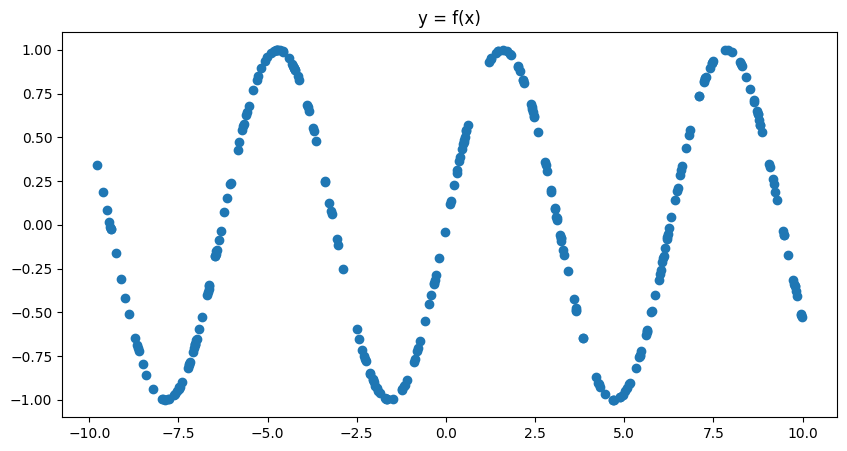

In [ ]:
def fun(x):
  return torch.sin(x.data)

x_train = torch.rand(300)
x_train = x_train * 20.0 - 10.0

y_train = fun(x_train.data)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('y = f(x)');

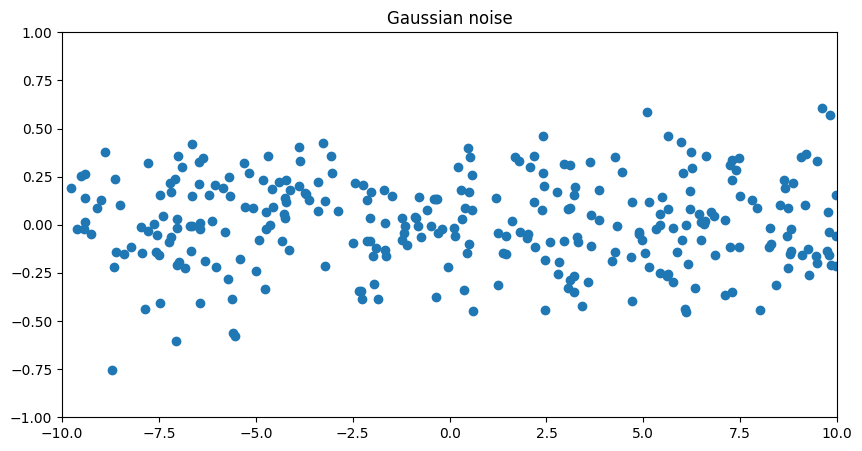

In [ ]:
noise = torch.randn(y_train.shape) / 4.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

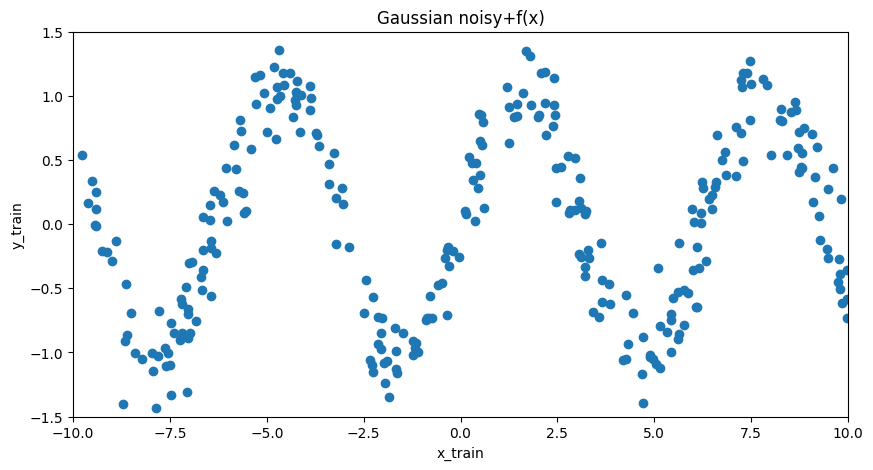

In [ ]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.axis([-10, 10, -1.5, 1.5])
plt.title('Gaussian noisy+f(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [ ]:
x_train.unsqueeze_(1)  # unsqueeze [n, 1] -> [1] ... [n]
y_train.unsqueeze_(1); # unsqueeze [n, 1] -> [1] ... [n]

**Validation dataset**

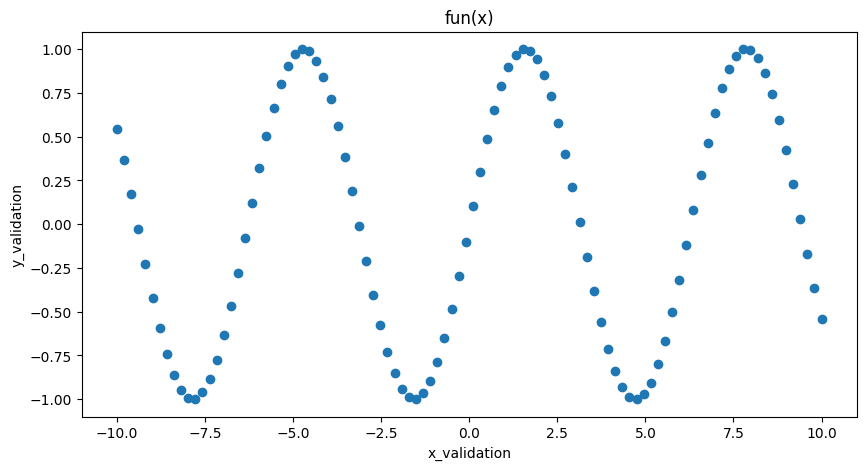

In [ ]:
x_validation = torch.linspace(-10, 10, 100)

y_validation = fun(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')

plt.title('fun(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [ ]:
x_validation.unsqueeze_(1) # unsqueeze [n, 1] -> [1, n]
y_validation.unsqueeze_(1); # unsqueeze [n, 1] -> [1, n]

**Model construction**

In [ ]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

In [ ]:
# Model_0
sine_net_0 = SineNet(n_hidden_neurons)

**Prediction**

In [ ]:
# build a graph
def predict(net, x, y, text = ""):

    for i in range(len(net)):
      if i == 0:
        y_pred = net[i](x)
      else :
        y_pred += net[i](x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.title(f'{text}')

**Optimizer**

In [ ]:
optimizer_0 = torch.optim.Adam(sine_net_0.parameters(), lr=0.01)

**Loss function**

In [ ]:
def loss(pred, target):
    squares = (pred - target) ** 2
    #squares = torch.abs(pred - target)
    return squares.mean()

**Training procedure**

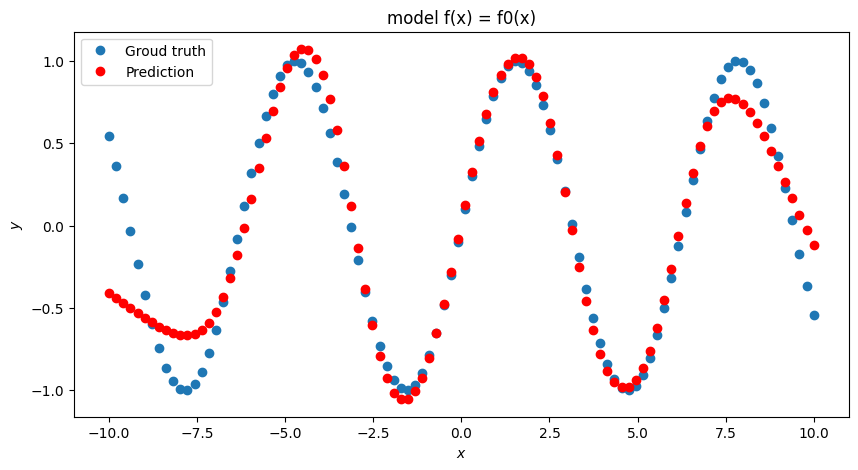

In [ ]:
for epoch_index in range(epoch):
    optimizer_0.zero_grad()

    y_pred = sine_net_0.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer_0.step()
net = []
net.append(sine_net_0)
predict(net, x_validation, y_validation, 'model f(x) = f0(x)')

**Algorithm Gradient Boosting Machine (GBM)**

In [ ]:
# Model_1
sine_net_1 = SineNet(n_hidden_neurons)

In [ ]:
# Optimizer
optimizer1 = torch.optim.Adam(sine_net_1.parameters(), lr=0.01)

In [ ]:
# Remainder
remainder = y_train - net[0](x_train).data

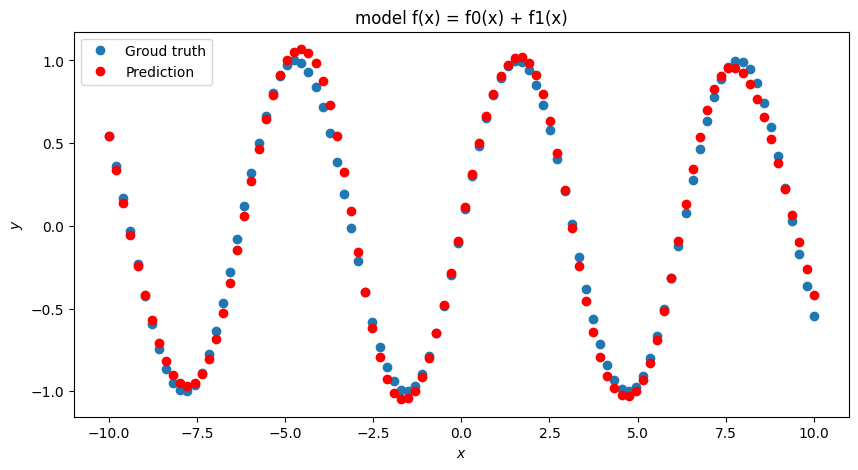

In [ ]:
for epoch_index in range(epoch):
    optimizer1.zero_grad()

    y_pred = sine_net_1.forward(x_train)
    loss_val = loss(y_pred, remainder)

    loss_val.backward()

    optimizer1.step()

net.append(sine_net_1)
predict(net, x_validation, y_validation, 'model f(x) = f0(x) + f1(x)')

In [ ]:
# Model_2
sine_net_2 = SineNet(n_hidden_neurons)

In [ ]:
# Optimizer
optimizer2 = torch.optim.Adam(sine_net_2.parameters(), lr=0.01)

In [ ]:
# Remainder
remainder = y_train - (net[0](x_train).data + net[1](x_train).data)

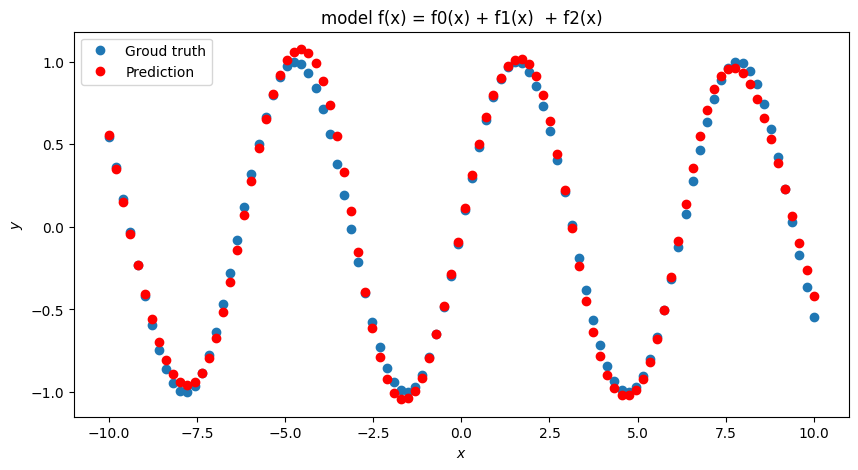

In [ ]:
for epoch_index in range(epoch):
    optimizer2.zero_grad()

    y_pred = sine_net_2.forward(x_train)
    loss_val = loss(y_pred, remainder)

    loss_val.backward()

    optimizer2.step()

net.append(sine_net_2)
predict(net, x_validation, y_validation, 'model f(x) = f0(x) + f1(x)  + f2(x)')